![sql](img/sql-logo.jpg)

# A beginner's guide to databases, SQL, & using them with `pandas`

**Scenario:** You are a data analyst for the Homeland Security, trying to create reports on the active airports world wide. The data you need to access is in a SQL database. YOu need to be able to query for the data in a database!

## Learning goals:
- Goal 1: Summarize the use case for sql in the data science skill set
- Goal 2: Define key sql terminology
- Goal 3: Get information about DB schema and table structure
- Goal 4: Use basic SQL commands:
    - Construct SQL queries
    - Use `JOIN` to merge tables along logical columns
    - Grouping Data with SQL, inlcuding `HAVING`
- Goal 5: Convert SQL to pandas

## Goal 1: Summarize

To date the data we've seen has looked like [this.](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm)

That is how we need data to look to run analysis and build models.<br>
But it doesn't _live_ there in it's native state.

[Netflix has a great article](https://medium.com/netflix-techblog/notebook-innovation-591ee3221233) describing three different data roles at their company, their different needs, and their toolsets.

![netflix](img/netflix-data-roles.jpeg)

Examining that graphic, SQL shows up as one of the tools of the _Data Engineer_ 

Data Engineers provide the essential data architecture services that make data science possible.

![hierarchy](img/ai-hierachy.png)

[Source: Monica Rogati’s fantastic Medium post “The AI Hierarchy of Needs”
](https://hackernoon.com/the-ai-hierarchy-of-needs-18f111fcc007)

## What does it mean to **Engineer Data**?

Let's start with a basic scenario:<br>
You are HR. You have *no* current database. 
How would you set it up?

Data needs considerations:
- What you want to store
- What "views" you anticipate wanting in the future

Structure considerations:
- Speed of retrieval
- How much data you are accessing
- How much you are storing

![etl](img/etl.png)

[img source: Jeff Hammerbacher’s slide from UC Berkeley CS 194 course ](https://bcourses.berkeley.edu/courses/1377158/pages/cs-194-16-introduction-to-data-science-fall-2015)

application database: really fast to retrieve database, but disparate

data warehouse: all data stored together, slower but can pull bigger set of data


### What is a Relational Database? 

![rdb](img/relational-dbms-model.png)
[reference for image ](https://www.studytonight.com/dbms/database-model.php)

### POPULAR RDBMS (relational database management system)

- SQLite  <- today we are learning this.
- MySQL   <- this is most common, first lightweight database (mid-90s)
- PostgreSql <- new hot stuff
- Oracle DB <- very expensive, but very reliable.
- SQL Server <- microsoft.

***
### SQL Readings

[History of SQL](https://www.businessnewsdaily.com/5804-what-is-sql.html)

[The original SQL paper from the 1970s.](https://www.seas.upenn.edu/~zives/03f/cis550/codd.pdf)

Structured Query Language, is a programming language that is used to communicate with and manipulate databases.

a database is a tool for collecting and organizing information. Databases can store information about people, products, orders or anything else. Many databases start in a word processing program or spreadsheet, but as they get larger many businesses will find it helpful to transfer them to a database created by a database management system.

data warehouse: 4-5T of data

pull down only exactly what you want

***
## Goal 2: Database terminology

### Relational Database Schema

![schema](img/MySQL_Schema_Music_Example.png)

[source of image](https://database.guide/what-is-a-database-schema/)

Collection of tables. relationship between tables are mapped.

Schema: visual representation of relationships/connections between tables/dataframes (ERD: entity relationship diagram)

crossfoot: can have multiple

= : only one

ie) albums have only one genre, but each genre can have thousands of albums

***
### SQLite

<img src="img/SQLite-Python.jpg" width=500>

- C library (fast)
- lightweight disk-based database
- that doesn’t require a separate server process
- nonstandard variant of the SQL query language
- applications can use SQLite for internal data storage (iPhone apps constantly creating databases on phones to retrieve data)
- use case: prototype an application using SQLite and then port the code to a larger database such as PostgreSQL or Oracle (development)


different from datawarehouses ran as a separate, dedicated server.
SQLite is on the file. 


[sqlite documentation](https://docs.python.org/2/library/sqlite3.html)

https://sqlitebrowser.org/dl/

## But what about connecting to database servers?

To connect to other database types there are many different libraries:
- Oracle: [cx_Oracle](https://oracle.github.io/python-cx_Oracle/)
- MySQL: [MySQL-python](https://github.com/farcepest/MySQLdb1)
- PostgreSQL: [Psycopg2](http://initd.org/psycopg/docs/)
- Microsoft SQL Server: [pymssql](http://www.pymssql.org/en/stable/)

modules. just drop in different modules to connect to different databases

These all implement [PEP 249: DB API v2](https://www.python.org/dev/peps/pep-0249/)

## Goal 3: Get going with sqlite!

In [1]:
import sqlite3

#### Load a DB object with `connect` and `cursor`

In [2]:
con = sqlite3.connect('data/flights.db') # .connect
cursor = con.cursor()

In [4]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is 06B9-E2F5

 Directory of C:\Users\jongs\Desktop\DS_2020\Course_Materials\code\hbs-ds-060120\module-1\day-9-sql-1\data

06/11/2020  07:03    <DIR>          .
06/11/2020  07:03    <DIR>          ..
06/11/2020  07:03         5,415,936 flights.db
               1 File(s)      5,415,936 bytes
               2 Dir(s)  27,967,500,288 bytes free


#### Use sqlite_master to find all the tables in the schema
Get the schema of a database from a db in sqlite

In [10]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall()) # execute and fetch!

# double quotes on the outside, single quotes on the inside

[('airports',), ('airlines',), ('routes',)]


Three tables in this database. 
just google "get tables from sqllite" (sqllite master)

In [9]:
# triple quotes
print("""He said, "Hello, world!" The end.""")
print('''He said, "Hello, world!" The end.''')

He said, "Hello, world!" The end.
He said, "Hello, world!" The end.


In [11]:
cursor.description

(('name', None, None, None, None, None, None),)

In [13]:
cursor.execute("SELECT name, type FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('airports', 'table'), ('airlines', 'table'), ('routes', 'table')]


In [15]:
cursor.execute("SELECT name, type FROM sqlite_master;")
print(cursor.fetchall())

[('airports', 'table'), ('ix_airports_index', 'index'), ('airlines', 'table'), ('ix_airlines_index', 'index'), ('routes', 'table'), ('ix_routes_index', 'index')]


In [18]:
cursor.execute("SELECT * FROM sqlite_master;") # ; means the end of sql command
results = cursor.fetchall()
for res in results:
    print(res)
    
# sqlLite can only execute one command at a time.
# not capable of stacking multiple sql commands separated by ;

('table', 'airports', 'airports', 2, 'CREATE TABLE airports (\n[index] INTEGER,\n  [id] TEXT,\n  [name] TEXT,\n  [city] TEXT,\n  [country] TEXT,\n  [code] TEXT,\n  [icao] TEXT,\n  [latitude] TEXT,\n  [longitude] TEXT,\n  [altitude] TEXT,\n  [offset] TEXT,\n  [dst] TEXT,\n  [timezone] TEXT\n)')
('index', 'ix_airports_index', 'airports', 3, 'CREATE INDEX ix_airports_index ON airports ([index])')
('table', 'airlines', 'airlines', 945, 'CREATE TABLE airlines (\n[index] INTEGER,\n  [id] TEXT,\n  [name] TEXT,\n  [alias] TEXT,\n  [iata] TEXT,\n  [icao] TEXT,\n  [callsign] TEXT,\n  [country] TEXT,\n  [active] TEXT\n)')
('index', 'ix_airlines_index', 'airlines', 946, 'CREATE INDEX ix_airlines_index ON airlines ([index])')
('table', 'routes', 'routes', 1393, 'CREATE TABLE routes (\n[index] INTEGER,\n  [airline] TEXT,\n  [airline_id] TEXT,\n  [source] TEXT,\n  [source_id] TEXT,\n  [dest] TEXT,\n  [dest_id] TEXT,\n  [codeshare] TEXT,\n  [stops] TEXT,\n  [equipment] TEXT\n)')
('index', 'ix_routes_i

In [19]:
cursor.description

(('type', None, None, None, None, None, None),
 ('name', None, None, None, None, None, None),
 ('tbl_name', None, None, None, None, None, None),
 ('rootpage', None, None, None, None, None, None),
 ('sql', None, None, None, None, None, None))

In [20]:
cursor.execute("SELECT type, tbl_name, rootpage FROM sqlite_master;") 
results = cursor.fetchall()
for res in results:
    print(res)

('table', 'airports', 2)
('index', 'airports', 3)
('table', 'airlines', 945)
('index', 'airlines', 946)
('table', 'routes', 1393)
('index', 'routes', 1394)


In [21]:
cursor.description

(('type', None, None, None, None, None, None),
 ('tbl_name', None, None, None, None, None, None),
 ('rootpage', None, None, None, None, None, None))

In [22]:
# capitalization does not matter in sql (unlike how it is crucial in Python)

cursor objects are pointers, like variables in python

#### Get information about one table

**A note about** `execute`<br>
Each time you use it, you reset the value of cursor

In [33]:
cursor.execute("SELECT * FROM airports as a").fetchone() 
#fetches one row

(0,
 '1',
 'Goroka',
 'Goroka',
 'Papua New Guinea',
 'GKA',
 'AYGA',
 '-6.081689',
 '145.391881',
 '5282',
 '10',
 'U',
 'Pacific/Port_Moresby')

In [456]:
cursor.execute("SELECT * FROM airports").fetchone()

(0,
 '1',
 'Goroka',
 'Goroka',
 'Papua New Guinea',
 'GKA',
 'AYGA',
 '-6.081689',
 '145.391881',
 '5282',
 '10',
 'U',
 'Pacific/Port_Moresby')

In [457]:
cursor.fetchone()  # without new execute, it goes to the next row
# to get back to row 1, or to go back, you need to execute again.
# you have to store results from the fetch command to get back to them

(1,
 '2',
 'Madang',
 'Madang',
 'Papua New Guinea',
 'MAG',
 'AYMD',
 '-5.207083',
 '145.7887',
 '20',
 '10',
 'U',
 'Pacific/Port_Moresby')

In [458]:
cursor.fetchmany(4)  # fetched as tuples, but basically rows

[(2,
  '3',
  'Mount Hagen',
  'Mount Hagen',
  'Papua New Guinea',
  'HGU',
  'AYMH',
  '-5.826789',
  '144.295861',
  '5388',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (3,
  '4',
  'Nadzab',
  'Nadzab',
  'Papua New Guinea',
  'LAE',
  'AYNZ',
  '-6.569828',
  '146.726242',
  '239',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (4,
  '5',
  'Port Moresby Jacksons Intl',
  'Port Moresby',
  'Papua New Guinea',
  'POM',
  'AYPY',
  '-9.443383',
  '147.22005',
  '146',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (5,
  '6',
  'Wewak Intl',
  'Wewak',
  'Papua New Guinea',
  'WWK',
  'AYWK',
  '-3.583828',
  '143.669186',
  '19',
  '10',
  'U',
  'Pacific/Port_Moresby')]

In [459]:
for row in cursor.fetchmany(4):
    print(row)

(6, '7', 'Narsarsuaq', 'Narssarssuaq', 'Greenland', 'UAK', 'BGBW', '61.160517', '-45.425978', '112', '-3', 'E', 'America/Godthab')
(7, '8', 'Nuuk', 'Godthaab', 'Greenland', 'GOH', 'BGGH', '64.190922', '-51.678064', '283', '-3', 'E', 'America/Godthab')
(8, '9', 'Sondre Stromfjord', 'Sondrestrom', 'Greenland', 'SFJ', 'BGSF', '67.016969', '-50.689325', '165', '-3', 'E', 'America/Godthab')
(9, '10', 'Thule Air Base', 'Thule', 'Greenland', 'THU', 'BGTL', '76.531203', '-68.703161', '251', '-4', 'E', 'America/Thule')


In [460]:
for row in cursor.fetchmany(4):
    print(' '.join([str(x) for x in row]))  # using list comprehension

10 11 Akureyri Akureyri Iceland AEY BIAR 65.659994 -18.072703 6 0 N Atlantic/Reykjavik
11 12 Egilsstadir Egilsstadir Iceland EGS BIEG 65.283333 -14.401389 76 0 N Atlantic/Reykjavik
12 13 Hornafjordur Hofn Iceland HFN BIHN 64.295556 -15.227222 24 0 N Atlantic/Reykjavik
13 14 Husavik Husavik Iceland HZK BIHU 65.952328 -17.425978 48 0 N Atlantic/Reykjavik


In [461]:
for row in cursor.fetchmany(10):
    print('\t'.join([str(x) for x in row]))  # using list comprehension

14	15	Isafjordur	Isafjordur	Iceland	IFJ	BIIS	66.058056	-23.135278	8	0	N	Atlantic/Reykjavik
15	16	Keflavik International Airport	Keflavik	Iceland	KEF	BIKF	63.985	-22.605556	171	0	N	Atlantic/Reykjavik
16	17	Patreksfjordur	Patreksfjordur	Iceland	PFJ	BIPA	65.555833	-23.965	11	0	N	Atlantic/Reykjavik
17	18	Reykjavik	Reykjavik	Iceland	RKV	BIRK	64.13	-21.940556	48	0	N	Atlantic/Reykjavik
18	19	Siglufjordur	Siglufjordur	Iceland	SIJ	BISI	66.133333	-18.916667	10	0	N	Atlantic/Reykjavik
19	20	Vestmannaeyjar	Vestmannaeyjar	Iceland	VEY	BIVM	63.424303	-20.278875	326	0	N	Atlantic/Reykjavik
20	21	Sault Ste Marie	Sault Sainte Marie	Canada	YAM	CYAM	46.485001	-84.509445	630	-5	A	America/Toronto
21	22	Winnipeg St Andrews	Winnipeg	Canada	YAV	CYAV	50.056389	-97.0325	760	-6	A	America/Winnipeg
22	23	Shearwater	Halifax	Canada	YAW	CYAW	44.639721	-63.499444	167	-4	A	America/Halifax
23	24	St Anthony	St. Anthony	Canada	YAY	CYAY	51.391944	-56.083056	108	-3.5	A	America/St_Johns


In [433]:
y = 123
y

123

In [434]:
str(y)

'123'

#### Use description

In [462]:
cursor.description

(('index', None, None, None, None, None, None),
 ('id', None, None, None, None, None, None),
 ('name', None, None, None, None, None, None),
 ('city', None, None, None, None, None, None),
 ('country', None, None, None, None, None, None),
 ('code', None, None, None, None, None, None),
 ('icao', None, None, None, None, None, None),
 ('latitude', None, None, None, None, None, None),
 ('longitude', None, None, None, None, None, None),
 ('altitude', None, None, None, None, None, None),
 ('offset', None, None, None, None, None, None),
 ('dst', None, None, None, None, None, None),
 ('timezone', None, None, None, None, None, None))

#### Or use `Pragma`
`Pragma` tool [link here](https://www.sqlite.org/pragma.html#pragma_table_info)

**output**<br>
`(column id, column name, data type, whether or not the column can be NULL, and the default value for the column)`

andy doesn't like pragma too much

In [463]:
cursor.execute("PRAGMA table_info(airports)")
info = cursor.fetchall()
print(*info, sep = "\n") 

(0, 'index', 'INTEGER', 0, None, 0)
(1, 'id', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'city', 'TEXT', 0, None, 0)
(4, 'country', 'TEXT', 0, None, 0)
(5, 'code', 'TEXT', 0, None, 0)
(6, 'icao', 'TEXT', 0, None, 0)
(7, 'latitude', 'TEXT', 0, None, 0)
(8, 'longitude', 'TEXT', 0, None, 0)
(9, 'altitude', 'TEXT', 0, None, 0)
(10, 'offset', 'TEXT', 0, None, 0)
(11, 'dst', 'TEXT', 0, None, 0)
(12, 'timezone', 'TEXT', 0, None, 0)


#### Making fetch happen

`.fetchall()` is how you get the query results out of the object.

You can also `.fetchone()` or `.fetchmany()`

**Task:** Get the descriptive data for airlines and routes tables

In [465]:
z = (1, 2)

In [469]:
x, y = (1, 2) # unpacking
type(x)

int

In [467]:
print(z)

(1, 2)


In [468]:
print(z[0],z[1])

1 2


In [470]:
# same as
print(*z)    # unpacking

1 2


In [471]:
cursor.execute("PRAGMA table_info(airlines)")
info = cursor.fetchall()   # info is a list of tuples
print(*info, sep = "\n")  # unpacking the list of tuples
# so it prints each one

(0, 'index', 'INTEGER', 0, None, 0)
(1, 'id', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'alias', 'TEXT', 0, None, 0)
(4, 'iata', 'TEXT', 0, None, 0)
(5, 'icao', 'TEXT', 0, None, 0)
(6, 'callsign', 'TEXT', 0, None, 0)
(7, 'country', 'TEXT', 0, None, 0)
(8, 'active', 'TEXT', 0, None, 0)


In [474]:
cursor.execute("PRAGMA table_info(routes)")
info = cursor.fetchall()
print(*info, sep = "\n")

(0, 'index', 'INTEGER', 0, None, 0)
(1, 'airline', 'TEXT', 0, None, 0)
(2, 'airline_id', 'TEXT', 0, None, 0)
(3, 'source', 'TEXT', 0, None, 0)
(4, 'source_id', 'TEXT', 0, None, 0)
(5, 'dest', 'TEXT', 0, None, 0)
(6, 'dest_id', 'TEXT', 0, None, 0)
(7, 'codeshare', 'TEXT', 0, None, 0)
(8, 'stops', 'TEXT', 0, None, 0)
(9, 'equipment', 'TEXT', 0, None, 0)


BD Browser time


open database

BD browser for SQL Lite only. it shows the structure of the data, so no real need to use pragma

you will use a different tool for a different SQL database type, but you will use a GUI to see the data.

***
## Goal 4: Use basic SQL commands 

### The Structure of a SQL Query

<img src='img/sql_statement.jpg'/>

### Constructing SQL queries

**`SELECT`**:  The columns you want
  - options: `DISTINCT` to pull only unique rows, using `AS` to rename columns, single number aggregates

**`FROM`:** the source tables
  - options: also uses aliasing with `AS`; joining with `[LEFT|INNER|RIGHT|FULL] JOIN ___ [ON|USING]`

**`WHERE`**: your filters
  - options: comparators like `=` & `>=`; `BETWEEN`, `IN`, `LIKE` (with wildcards `%`); booleans like `AND`, `OR`, `NOT`

**`ORDER BY`**: sorting
  - options: `ASC` (default) and `DESC`

**`LIMIT`**:  # of rows to return (pair with `OFFSET`)

**Task**: 
- Select only active airlines in the UK from the airlines table
- Select the unique list of countries with airports

go to DB Browser


SQL is 1-indexed!!
unlike python

= in SQL is equality (== in Python)

use single quotes for strings! not all SQL databases accept double quote

sorting based on ASCII codes: use  lower(name)

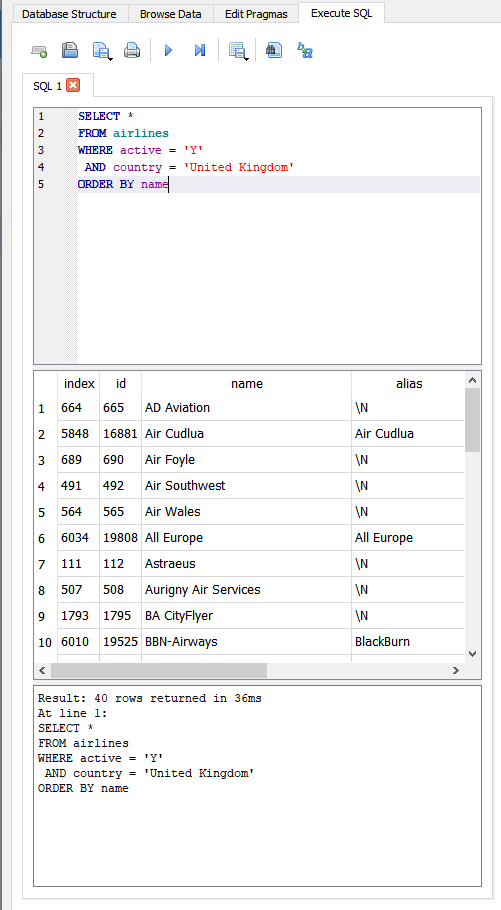

In [477]:
SELECT *
FROM airlines
WHERE active = 'Y'
 AND country = 'United Kingdom'
ORDER BY lower(name)

SyntaxError: invalid syntax (<ipython-input-477-8a4390c93688>, line 1)

In [ ]:
cursor.execute("""



""")
cursor.fetchall()  

In [478]:
cursor.execute("""

SELECT *
FROM airlines
WHERE active = 'Y'
 AND country = 'United Kingdom'
ORDER BY lower(name)

""")
cursor.fetchall()  

[(664,
  '665',
  'AD Aviation',
  '\\N',
  None,
  'VUE',
  'FLIGHTVUE',
  'United Kingdom',
  'Y'),
 (5848,
  '16881',
  'Air Cudlua',
  'Air Cudlua',
  None,
  'CUD',
  'Cudlua',
  'United Kingdom',
  'Y'),
 (689, '690', 'Air Foyle', '\\N', 'GS', 'UPA', 'FOYLE', 'United Kingdom', 'Y'),
 (491,
  '492',
  'Air Southwest',
  '\\N',
  None,
  'WOW',
  'SWALLOW',
  'United Kingdom',
  'Y'),
 (564,
  '565',
  'Air Wales',
  '\\N',
  '6G',
  'AWW',
  'RED DRAGON',
  'United Kingdom',
  'Y'),
 (6034,
  '19808',
  'All Europe',
  'All Europe',
  'N9',
  'N99',
  None,
  'United Kingdom',
  'Y'),
 (111,
  '112',
  'Astraeus',
  '\\N',
  '5W',
  'AEU',
  'FLYSTAR',
  'United Kingdom',
  'Y'),
 (507,
  '508',
  'Aurigny Air Services',
  '\\N',
  'GR',
  'AUR',
  'AYLINE',
  'United Kingdom',
  'Y'),
 (1793,
  '1795',
  'BA CityFlyer',
  '\\N',
  'CJ',
  'CFE',
  'FLYER',
  'United Kingdom',
  'Y'),
 (6010,
  '19525',
  'BBN-Airways',
  'BlackBurn',
  None,
  'EGH',
  'BBN',
  'United Kingdom',


In [479]:
cursor.execute("""

SELECT DISTINCT country
FROM airports
ORDER by lower(country)

""")
cursor.fetchall()  

[('Afghanistan',),
 ('Albania',),
 ('Algeria',),
 ('American Samoa',),
 ('Angola',),
 ('Anguilla',),
 ('Antarctica',),
 ('Antigua and Barbuda',),
 ('Argentina',),
 ('Armenia',),
 ('Aruba',),
 ('Australia',),
 ('Austria',),
 ('Azerbaijan',),
 ('Bahamas',),
 ('Bahrain',),
 ('Bangladesh',),
 ('Barbados',),
 ('Belarus',),
 ('Belgium',),
 ('Belize',),
 ('Benin',),
 ('Bermuda',),
 ('Bhutan',),
 ('Bolivia',),
 ('Bosnia and Herzegovina',),
 ('Botswana',),
 ('Brazil',),
 ('British Indian Ocean Territory',),
 ('British Virgin Islands',),
 ('Brunei',),
 ('Bulgaria',),
 ('Burkina Faso',),
 ('Burma',),
 ('Burundi',),
 ('Cambodia',),
 ('Cameroon',),
 ('Canada',),
 ('Cape Verde',),
 ('Cayman Islands',),
 ('Central African Republic',),
 ('Chad',),
 ('Chile',),
 ('China',),
 ('Christmas Island',),
 ('Cocos (Keeling) Islands',),
 ('Colombia',),
 ('Comoros',),
 ('Congo (Brazzaville)',),
 ('Congo (Kinshasa)',),
 ('Cook Islands',),
 ('Costa Rica',),
 ("Cote d'Ivoire",),
 ('Croatia',),
 ('Cuba',),
 ('Cyprus

In [481]:
cursor.execute("""

SELECT country
FROM airports
GROUP by country
ORDER by lower(country)

""")
cursor.fetchall()  

[('Afghanistan',),
 ('Albania',),
 ('Algeria',),
 ('American Samoa',),
 ('Angola',),
 ('Anguilla',),
 ('Antarctica',),
 ('Antigua and Barbuda',),
 ('Argentina',),
 ('Armenia',),
 ('Aruba',),
 ('Australia',),
 ('Austria',),
 ('Azerbaijan',),
 ('Bahamas',),
 ('Bahrain',),
 ('Bangladesh',),
 ('Barbados',),
 ('Belarus',),
 ('Belgium',),
 ('Belize',),
 ('Benin',),
 ('Bermuda',),
 ('Bhutan',),
 ('Bolivia',),
 ('Bosnia and Herzegovina',),
 ('Botswana',),
 ('Brazil',),
 ('British Indian Ocean Territory',),
 ('British Virgin Islands',),
 ('Brunei',),
 ('Bulgaria',),
 ('Burkina Faso',),
 ('Burma',),
 ('Burundi',),
 ('Cambodia',),
 ('Cameroon',),
 ('Canada',),
 ('Cape Verde',),
 ('Cayman Islands',),
 ('Central African Republic',),
 ('Chad',),
 ('Chile',),
 ('China',),
 ('Christmas Island',),
 ('Cocos (Keeling) Islands',),
 ('Colombia',),
 ('Comoros',),
 ('Congo (Brazzaville)',),
 ('Congo (Kinshasa)',),
 ('Cook Islands',),
 ('Costa Rica',),
 ("Cote d'Ivoire",),
 ('Croatia',),
 ('Cuba',),
 ('Cyprus

In [480]:
#use a DB browser to write SQL queries then import

cursor.execute("""



""")
cursor.fetchall()  

[]

### SQL Joins

SQL joins can be used to both **add** data to a table and **remove** data from a table. 

<img src="img/venn.png" width=550>

- Inner join: default join. only gives where there is a match (values exactly the same)
- Left join: every row from A and matching rows from B


default join in databases is inner.
left is most common.

**Task** Write a query that will join the latitude and longitude data from the airports table to the information on the routes table

In [482]:
cursor.execute("""
SELECT *
FROM routes as r
JOIN airports as a on source_id = a.id 

-- default join is inner
-- order does not matter in join = statement
""")
print(*cursor.description, sep='\n')

('index', None, None, None, None, None, None)
('airline', None, None, None, None, None, None)
('airline_id', None, None, None, None, None, None)
('source', None, None, None, None, None, None)
('source_id', None, None, None, None, None, None)
('dest', None, None, None, None, None, None)
('dest_id', None, None, None, None, None, None)
('codeshare', None, None, None, None, None, None)
('stops', None, None, None, None, None, None)
('equipment', None, None, None, None, None, None)
('index', None, None, None, None, None, None)
('id', None, None, None, None, None, None)
('name', None, None, None, None, None, None)
('city', None, None, None, None, None, None)
('country', None, None, None, None, None, None)
('code', None, None, None, None, None, None)
('icao', None, None, None, None, None, None)
('latitude', None, None, None, None, None, None)
('longitude', None, None, None, None, None, None)
('altitude', None, None, None, None, None, None)
('offset', None, None, None, None, None, None)
('dst',

In [492]:
cursor.execute("""
SELECT *
FROM routes as r
JOIN airports as a on source_id = a.id 

-- default join is inner
-- order does not matter in join = statement
""")
print(*cursor.fetchmany(10), sep='\n')

(0, '2B', '410', 'AER', '2965', 'KZN', '2990', None, '0', 'CR2', 2886, '2965', 'Sochi', 'Sochi', 'Russia', 'AER', 'URSS', '43.449928', '39.956589', '89', '4', 'N', 'Europe/Moscow')
(1, '2B', '410', 'ASF', '2966', 'KZN', '2990', None, '0', 'CR2', 2887, '2966', 'Astrakhan', 'Astrakhan', 'Russia', 'ASF', 'URWA', '46.283333', '48.006278', '-65', '4', 'N', 'Europe/Moscow')
(2, '2B', '410', 'ASF', '2966', 'MRV', '2962', None, '0', 'CR2', 2887, '2966', 'Astrakhan', 'Astrakhan', 'Russia', 'ASF', 'URWA', '46.283333', '48.006278', '-65', '4', 'N', 'Europe/Moscow')
(3, '2B', '410', 'CEK', '2968', 'KZN', '2990', None, '0', 'CR2', 2889, '2968', 'Balandino', 'Chelyabinsk', 'Russia', 'CEK', 'USCC', '55.305836', '61.503333', '769', '6', 'N', 'Asia/Yekaterinburg')
(4, '2B', '410', 'CEK', '2968', 'OVB', '4078', None, '0', 'CR2', 2889, '2968', 'Balandino', 'Chelyabinsk', 'Russia', 'CEK', 'USCC', '55.305836', '61.503333', '769', '6', 'N', 'Asia/Yekaterinburg')
(5, '2B', '410', 'DME', '4029', 'KZN', '2990'

list of tuples so we can pd it.


In [501]:
df = pd.DataFrame(cursor.fetchall())  # but no column names

In [503]:
df.index = [x[0]] for x in cursor.description  # update this by checking andy's

SyntaxError: invalid syntax (<ipython-input-503-360e08a61925>, line 1)

In [494]:
cursor.execute("""
SELECT r.*,
 latitude as source_lat,
 longitude as source_lon
FROM routes as r
JOIN airports as a on r.source_id = a.id 
""")
print(*cursor.description, sep='\n')

('index', None, None, None, None, None, None)
('airline', None, None, None, None, None, None)
('airline_id', None, None, None, None, None, None)
('source', None, None, None, None, None, None)
('source_id', None, None, None, None, None, None)
('dest', None, None, None, None, None, None)
('dest_id', None, None, None, None, None, None)
('codeshare', None, None, None, None, None, None)
('stops', None, None, None, None, None, None)
('equipment', None, None, None, None, None, None)
('source_lat', None, None, None, None, None, None)
('source_lon', None, None, None, None, None, None)


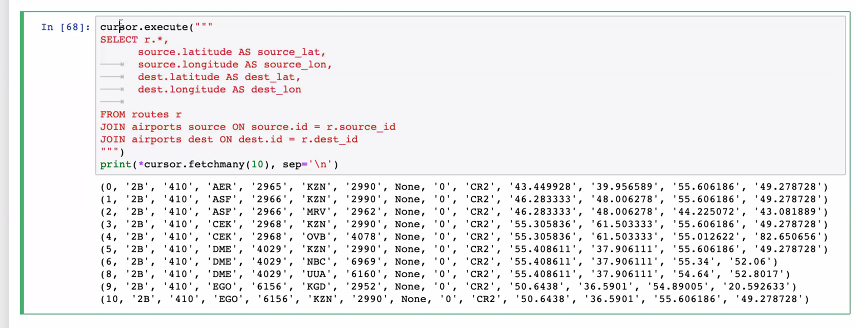

In [495]:
cursor.execute("""
SELECT r.*,
 source.latitude as source_lat,
 source.longitude as source_lon
 dest.latitude as dest_lat,
 dest.longitude as dest_lon
 
FROM routes as r
JOIN airports source on source.id = r.source_id
JOIN airports dest on dest.id = r.dest_id
""")
print(*cursor.description, sep='\n')

OperationalError: near "dest": syntax error

### Grouping statements

Combines `select` and `group by` when you want aggregates by values

`select` `min(x)` ... `max()`, `sum()`, etc

`group by x`

**Task**<br>
- Which countries have the highest amount of active airlines?
- Which countries have the highest amount of inactive airlines?
- What about airports by timezones?

In [ ]:
# Which countries have the highest amount of active airports?
cursor.execute("""
-- your code here;
""")
print(*cursor.fetchall(), sep='\n')

In [ ]:
# Which countries have the highest amount of inactive airports?
cursor.execute("""
-- your code here;
""")
print(*cursor.fetchall(), sep='\n')

In [ ]:
# What about airports by timezones?
cursor.execute("""
-- your code here;""")
print(*cursor.fetchall(), sep='\n')

In [ ]:
# It's always a good idea to close our connections when we're done
cursor.close()
con.close()

## Goal 5: Transfering from sqlite to pandas

In [496]:
import pandas as pd

In [497]:
pd_con = sqlite3.connect("data/flights.db")
df = pd.read_sql_query("select * from airports limit 5;", pd_con)
df

,index,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
1,1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.7887,20,10,U,Pacific/Port_Moresby
2,2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
3,3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
4,4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.22005,146,10,U,Pacific/Port_Moresby


**Task**: 
Convert one of the earlier queries in the lesson to a pandas data frame

In [498]:
df = pd.read_sql_query("""
SELECT r.*,
 latitude as source_lat,
 longitude as source_lon
FROM routes as r
JOIN airports as a on r.source_id = a.id 
""", pd_con)


In [499]:
df

,index,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,source_lat,source_lon
0,0,2B,410,AER,2965,KZN,2990,None,0,CR2,43.449928,39.956589
1,1,2B,410,ASF,2966,KZN,2990,None,0,CR2,46.283333,48.006278
2,2,2B,410,ASF,2966,MRV,2962,None,0,CR2,46.283333,48.006278
3,3,2B,410,CEK,2968,KZN,2990,None,0,CR2,55.305836,61.503333
4,4,2B,410,CEK,2968,OVB,4078,None,0,CR2,55.305836,61.503333
...,...,...,...,...,...,...,...,...,...,...,...,...
67419,67658,ZL,4178,WYA,6334,ADL,3341,None,0,SF3,-33.0589,137.514
67420,67659,ZM,19016,DME,4029,FRU,2912,None,0,734,55.408611,37.906111
67421,67660,ZM,19016,FRU,2912,DME,4029,None,0,734,43.061306,74.477556
67422,67661,ZM,19016,FRU,2912,OSS,2913,None,0,734,43.061306,74.477556


In [ ]:
# Which countries have the highest amount of active airports?
sql = '''
-- YOUR CODE HERE
'''
pd.read_sql_query(sql, conn)

In [ ]:
pd_con.close()

## Bonus: SQL-like querying in Pandas

`.query()`

[query documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)

In [ ]:
# Get data for an example
import pandas as pd
shelter_data=pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [ ]:
max_data = shelter_data.query('Name == "Max"')
max_data.head()


In [ ]:
#vs
shelter_data[shelter_data['Name']=="Max"].head()

In [ ]:
shelter_data.query('`Animal Type` == "Dog"').head()